In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imported required modules 

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

*reading data from original file from CDC.gov*

In [3]:
diseases_data=pd.read_csv("/content/drive/MyDrive/Springboard/Conditions_Contributing_to_COVID-19_Deaths.csv")

In [4]:
diseases_data.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,498.0,518.0,NaN
1,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,2222.0,2278.0,NaN
2,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,5884.0,6056.0,NaN
3,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,16875.0,17379.0,NaN
4,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,41419.0,42592.0,NaN


In [5]:
diseases_data = diseases_data.dropna(how='all')
diseases_data.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,498.0,518.0,NaN
1,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,2222.0,2278.0,NaN
2,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,5884.0,6056.0,NaN
3,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,16875.0,17379.0,NaN
4,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,41419.0,42592.0,NaN


*State disease data*


In [6]:
state_data = diseases_data[diseases_data['State'] != "United States"]
state_data.head(20)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
230,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,One or more data cells have counts between 1-9...
231,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,39.0,41.0,NaN
232,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,81.0,81.0,NaN
233,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,217.0,220.0,NaN
234,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,534.0,547.0,NaN
235,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,1006.0,1018.0,NaN
236,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,75-84,1094.0,1111.0,NaN
237,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,85+,759.0,766.0,NaN
238,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,Not stated,0.0,0.0,NaN
239,08/22/2021,01/01/2020,08/21/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,3735.0,3789.0,NaN


In [7]:
#filling Nan with 0
state_data['COVID-19 Deaths'] = state_data['COVID-19 Deaths'].replace(np.nan, 0)
state_data.head()
state_data.tail()
state_data.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Data As Of             object
Start Date             object
End Date               object
Group                  object
Year                  float64
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions    float64
Flag                   object
dtype: object

In [8]:
#Date conversions
state_data['Start Date'] = pd.to_datetime(state_data['Start Date'])
state_data['Data As Of'] = pd.to_datetime(state_data['Data As Of'])
state_data['End Date'] = pd.to_datetime(state_data['End Date'])
state_data['Year']= state_data['End Date'].dt.year
state_data['Month']= state_data['End Date'].dt.month
state_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
230,2021-08-22,2020-01-01,2021-08-21,By Total,2021,8,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,NaN,One or more data cells have counts between 1-9...
231,2021-08-22,2020-01-01,2021-08-21,By Total,2021,8,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,39.0,41.0,NaN
232,2021-08-22,2020-01-01,2021-08-21,By Total,2021,8,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,81.0,81.0,NaN
233,2021-08-22,2020-01-01,2021-08-21,By Total,2021,8,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,217.0,220.0,NaN
234,2021-08-22,2020-01-01,2021-08-21,By Total,2021,8,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,534.0,547.0,NaN


In [9]:
#group by total covid deaths in each state

state_deaths=state_data.groupby(['Year', 'State'])['COVID-19 Deaths'].agg('sum').reset_index()
state_deaths.head()

,Year,State,COVID-19 Deaths
0,2020,Alabama,86154.0
1,2020,Alaska,2281.0
2,2020,Arizona,136145.0
3,2020,Arkansas,55612.0
4,2020,California,549187.0


In [19]:
#COVID Deaths in all states 
import plotnine as plt9
plt9.options.figure_size = (6.4*4, 4.8*4)

#ggplot(state_deaths, aes(x= 'Year', y = 'COVID-19 Deaths')) + geom_line()  + facet_wrap('State', scales = "free")
#ggplot(state_deaths, aes(x= 'Year', y = 'COVID-19 Deaths')) + geom_line() + facet_wrap('age_group', scales = "free")

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


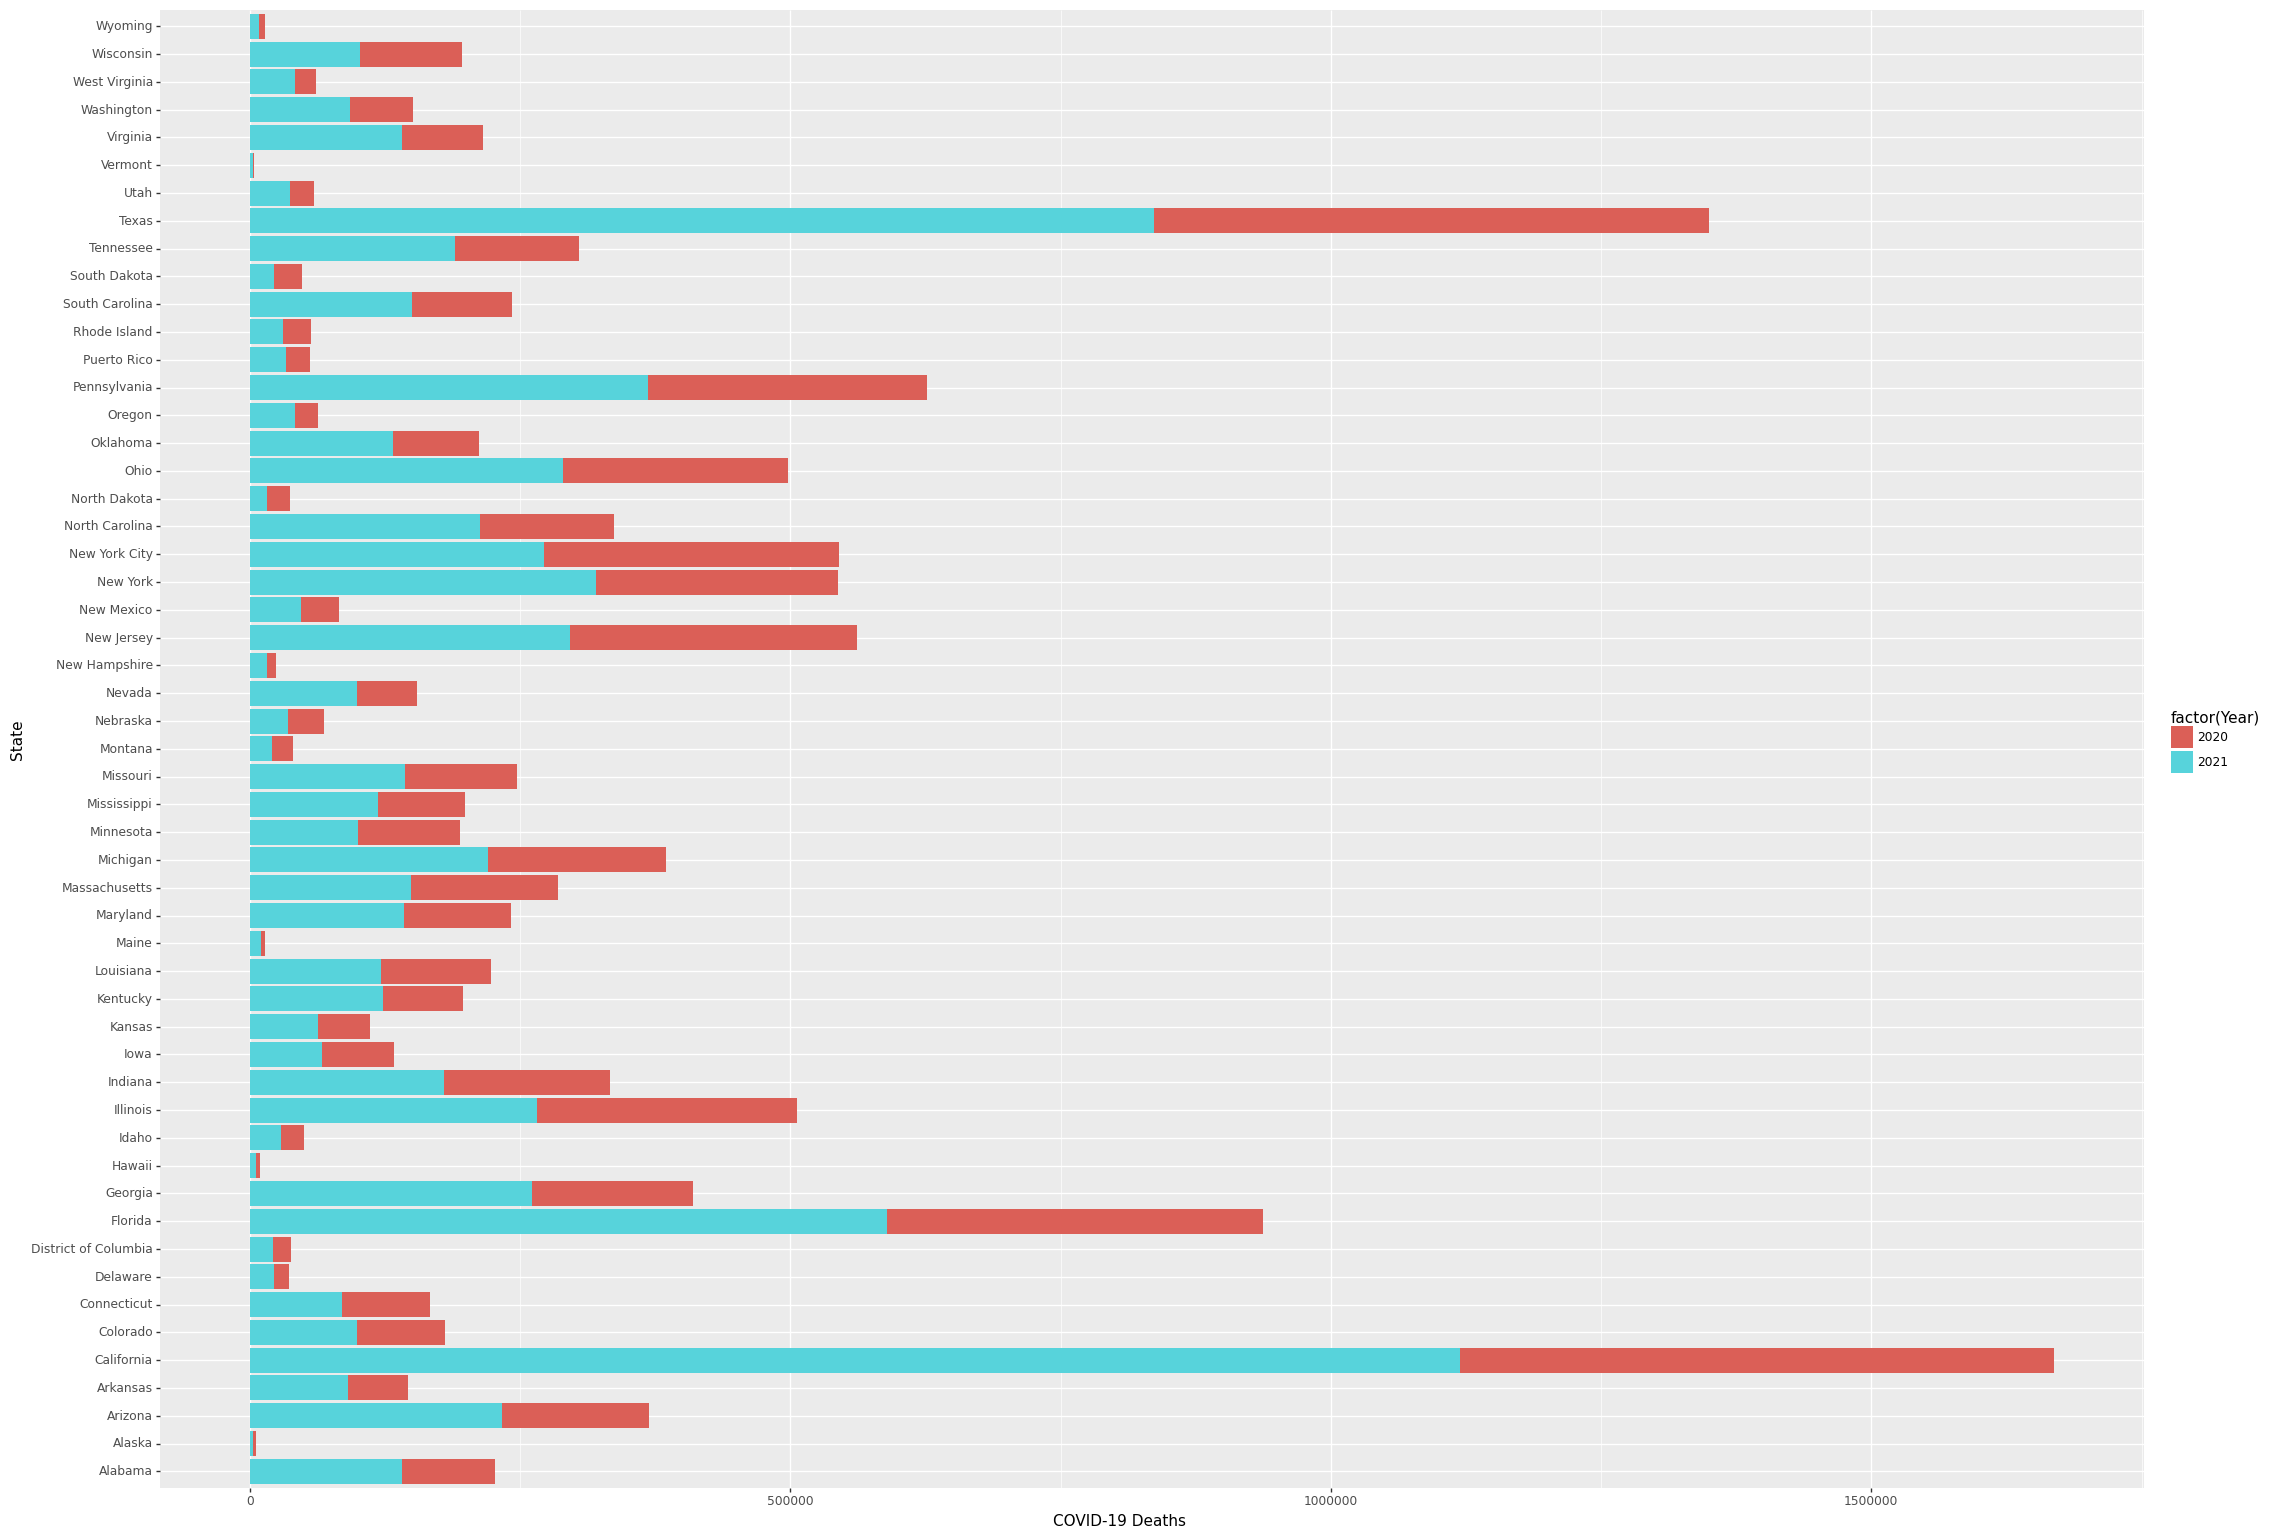

<ggplot: (8790873086685)>

In [11]:
#lets try histogram
#fig_dims = (10, 10)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "State", y = "COVID-19 Deaths", hue="Year",ax=ax, data=state_deaths)

ggplot(state_deaths, aes(x='State',y='COVID-19 Deaths',fill='factor(Year)')) + geom_bar(stat="identity") + coord_flip()

In [12]:
#age group and deaths
age_deaths = state_data.groupby(['Age Group'])['COVID-19 Deaths'].agg('sum').reset_index()
params = ["All Ages","Not stated"]
age_deaths = age_deaths[~age_deaths['Age Group'].isin(params)]
age_deaths.head(10)

,Age Group,COVID-19 Deaths
0,0-24,6223.0
1,25-34,34618.0
2,35-44,109210.0
3,45-54,341982.0
4,55-64,896387.0
5,65-74,1595438.0
6,75-84,1914011.0
7,85+,1933484.0


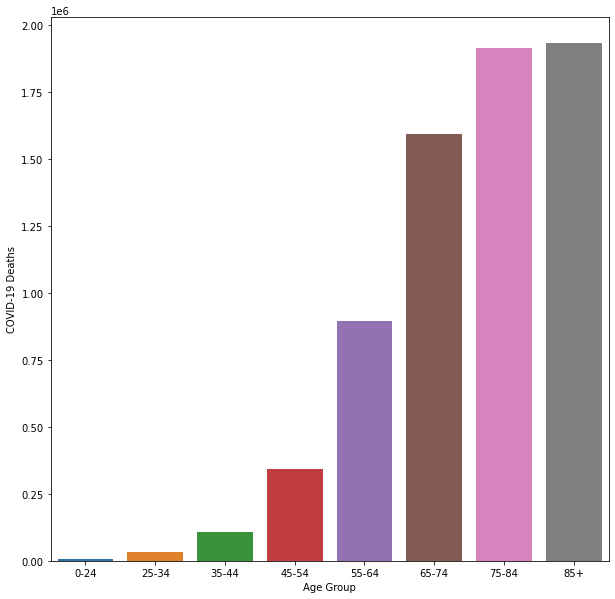

In [13]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Age Group", y = "COVID-19 Deaths", ax=ax, data=age_deaths)

In [14]:
#underlying conditions for COVID deaths
cause_deaths = state_data.groupby(['Year','Condition'])['COVID-19 Deaths'].agg('sum').reset_index()
cause_deaths.head(20)

,Year,Condition,COVID-19 Deaths
0,2020,Adult respiratory distress syndrome,160049.0
1,2020,All other conditions and causes (residual),565914.0
2,2020,Alzheimer disease,58480.0
3,2020,COVID-19,1541635.0
4,2020,Cardiac arrest,169974.0
5,2020,Cardiac arrhythmia,105145.0
6,2020,Cerebrovascular diseases,71841.0
7,2020,Chronic lower respiratory diseases,134422.0
8,2020,Diabetes,244892.0
9,2020,Heart failure,111856.0


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


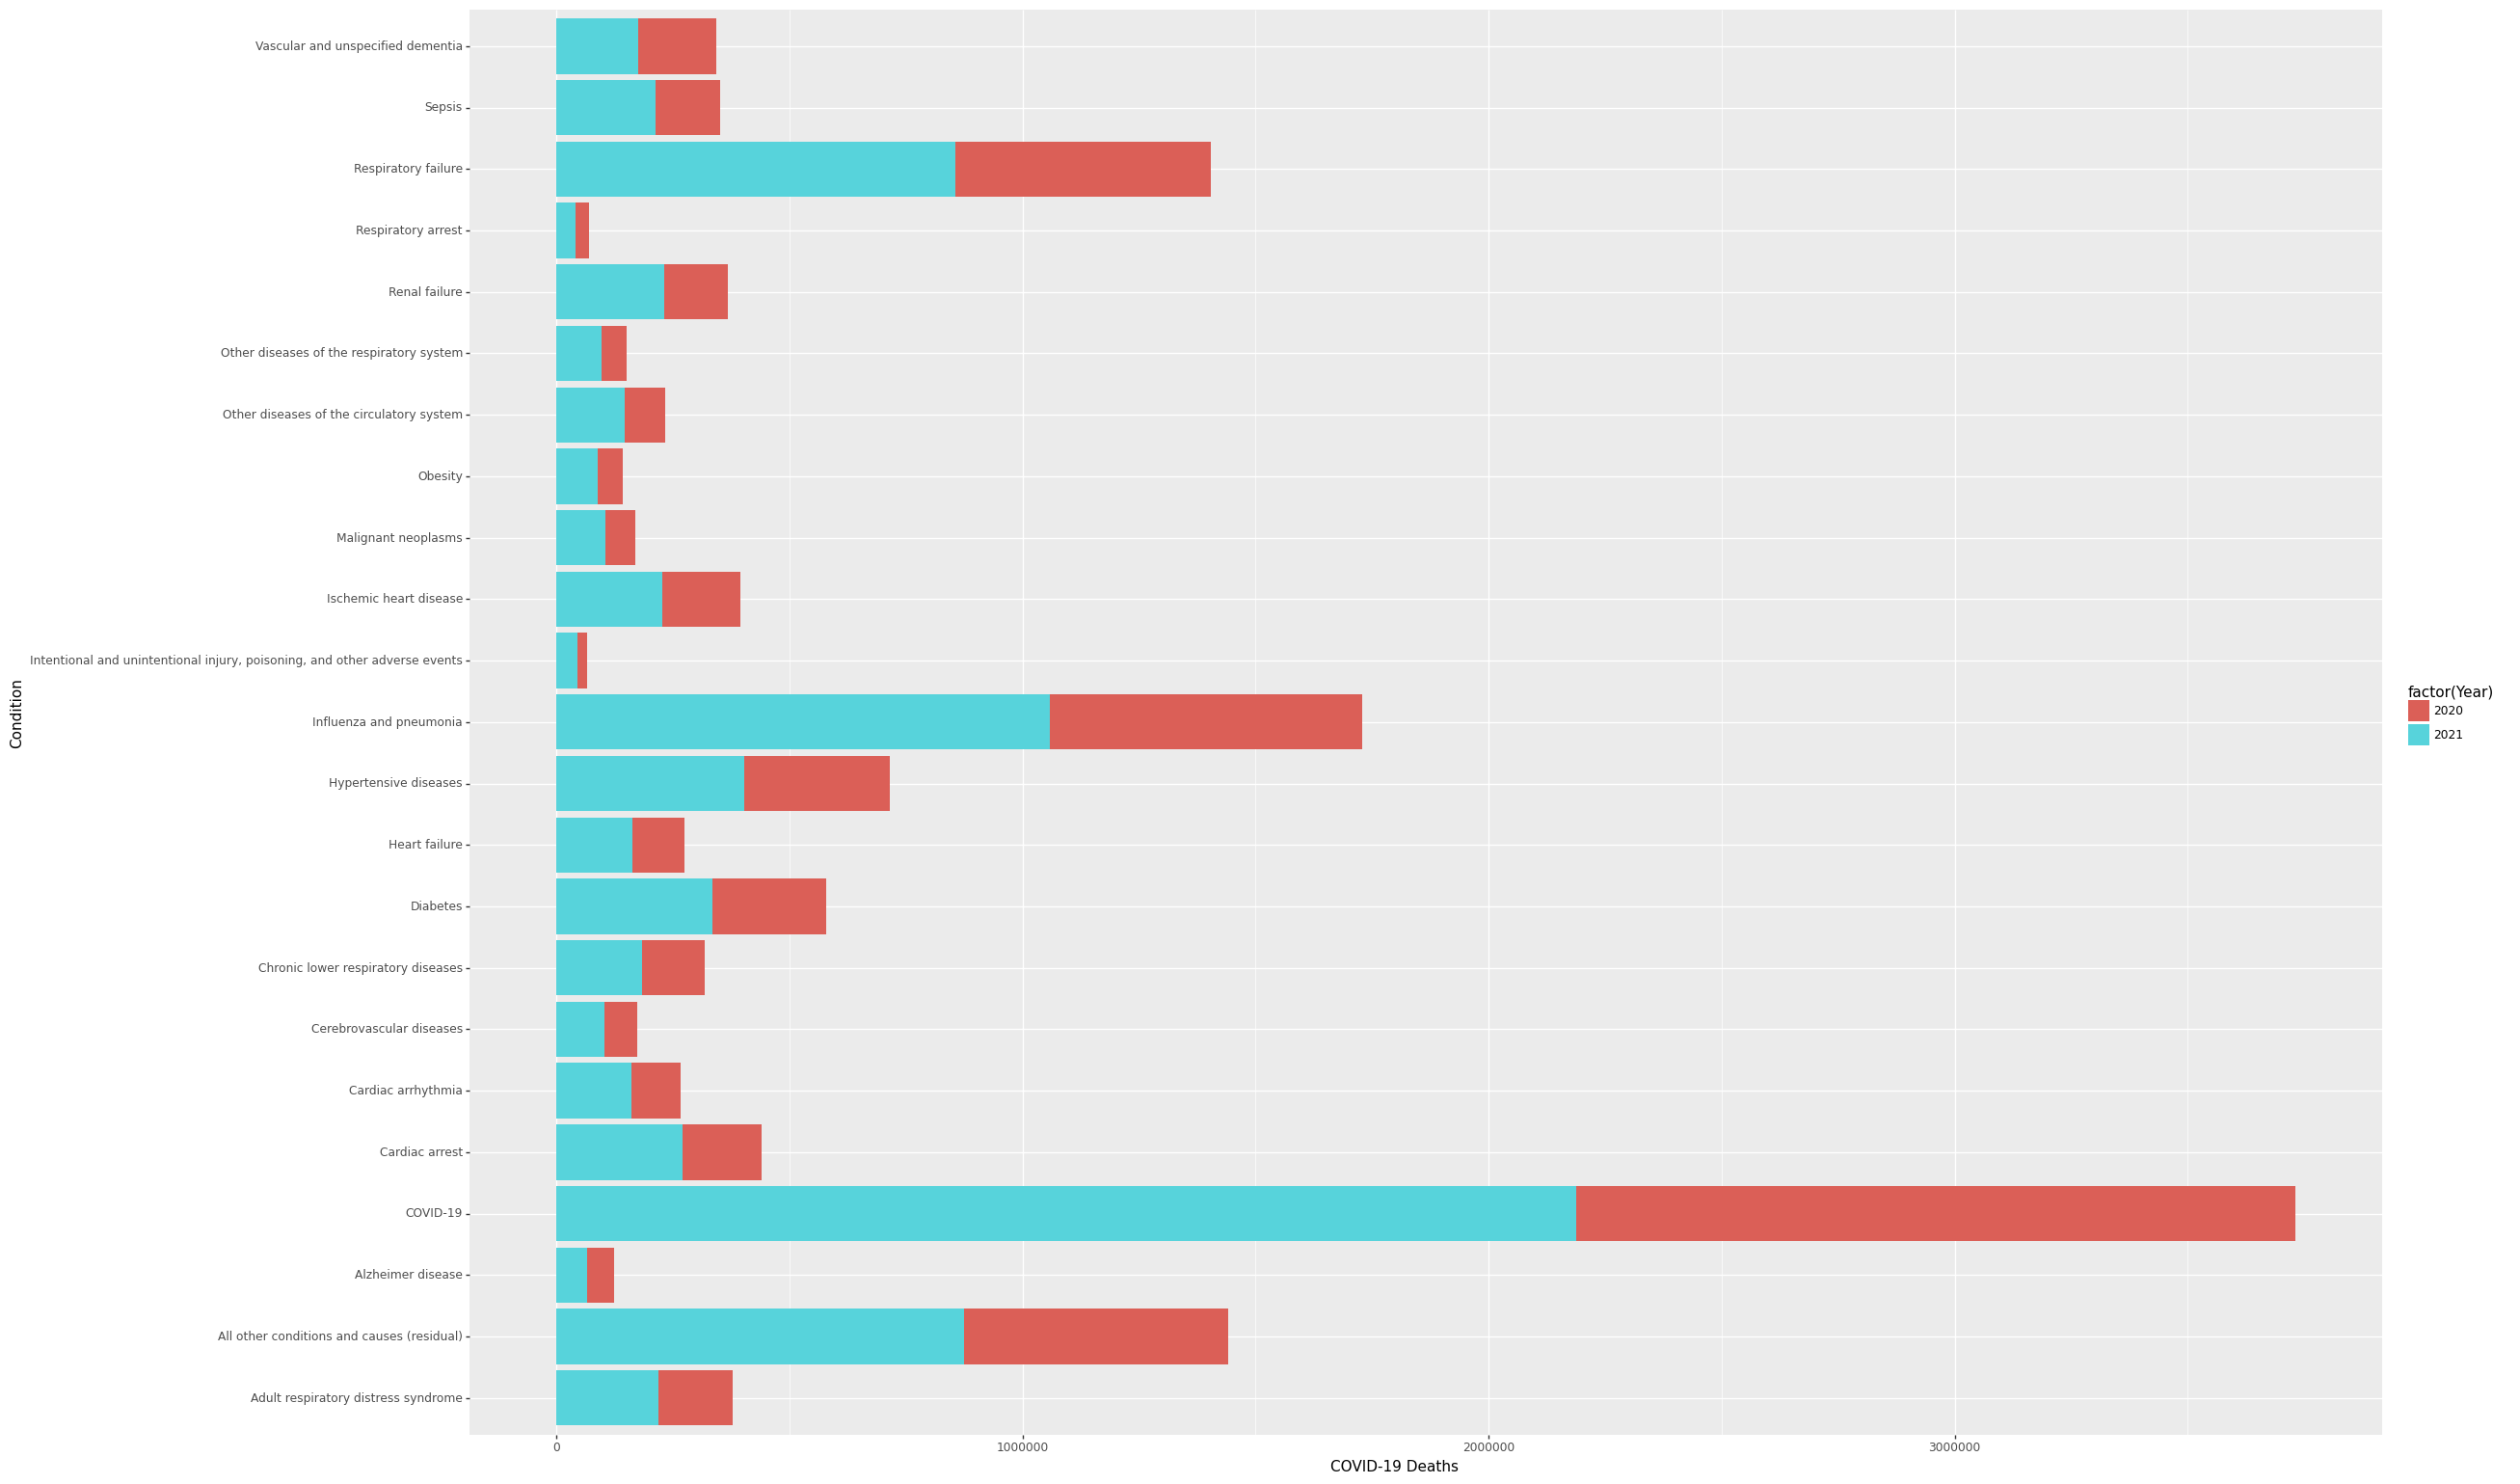

<ggplot: (8741762246577)>

In [15]:

ggplot(cause_deaths, aes(x='Condition',y='COVID-19 Deaths',fill='factor(Year)')) + geom_bar(stat="identity") + coord_flip()

In [17]:
age_cause_deaths = state_data.groupby(['Age Group','Condition'])['COVID-19 Deaths'].agg('sum').reset_index()
params = ["All Ages","Not stated"]
age_cause_deaths=age_cause_deaths.rename(columns={'Age Group': 'Age_Group'})
age_cause_deaths = age_cause_deaths[~age_cause_deaths['Age_Group'].isin(params)]
age_cause_deaths.head()

,Age_Group,Condition,COVID-19 Deaths
0,0-24,Adult respiratory distress syndrome,145.0
1,0-24,All other conditions and causes (residual),1179.0
2,0-24,Alzheimer disease,0.0
3,0-24,COVID-19,2902.0
4,0-24,Cardiac arrest,112.0


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


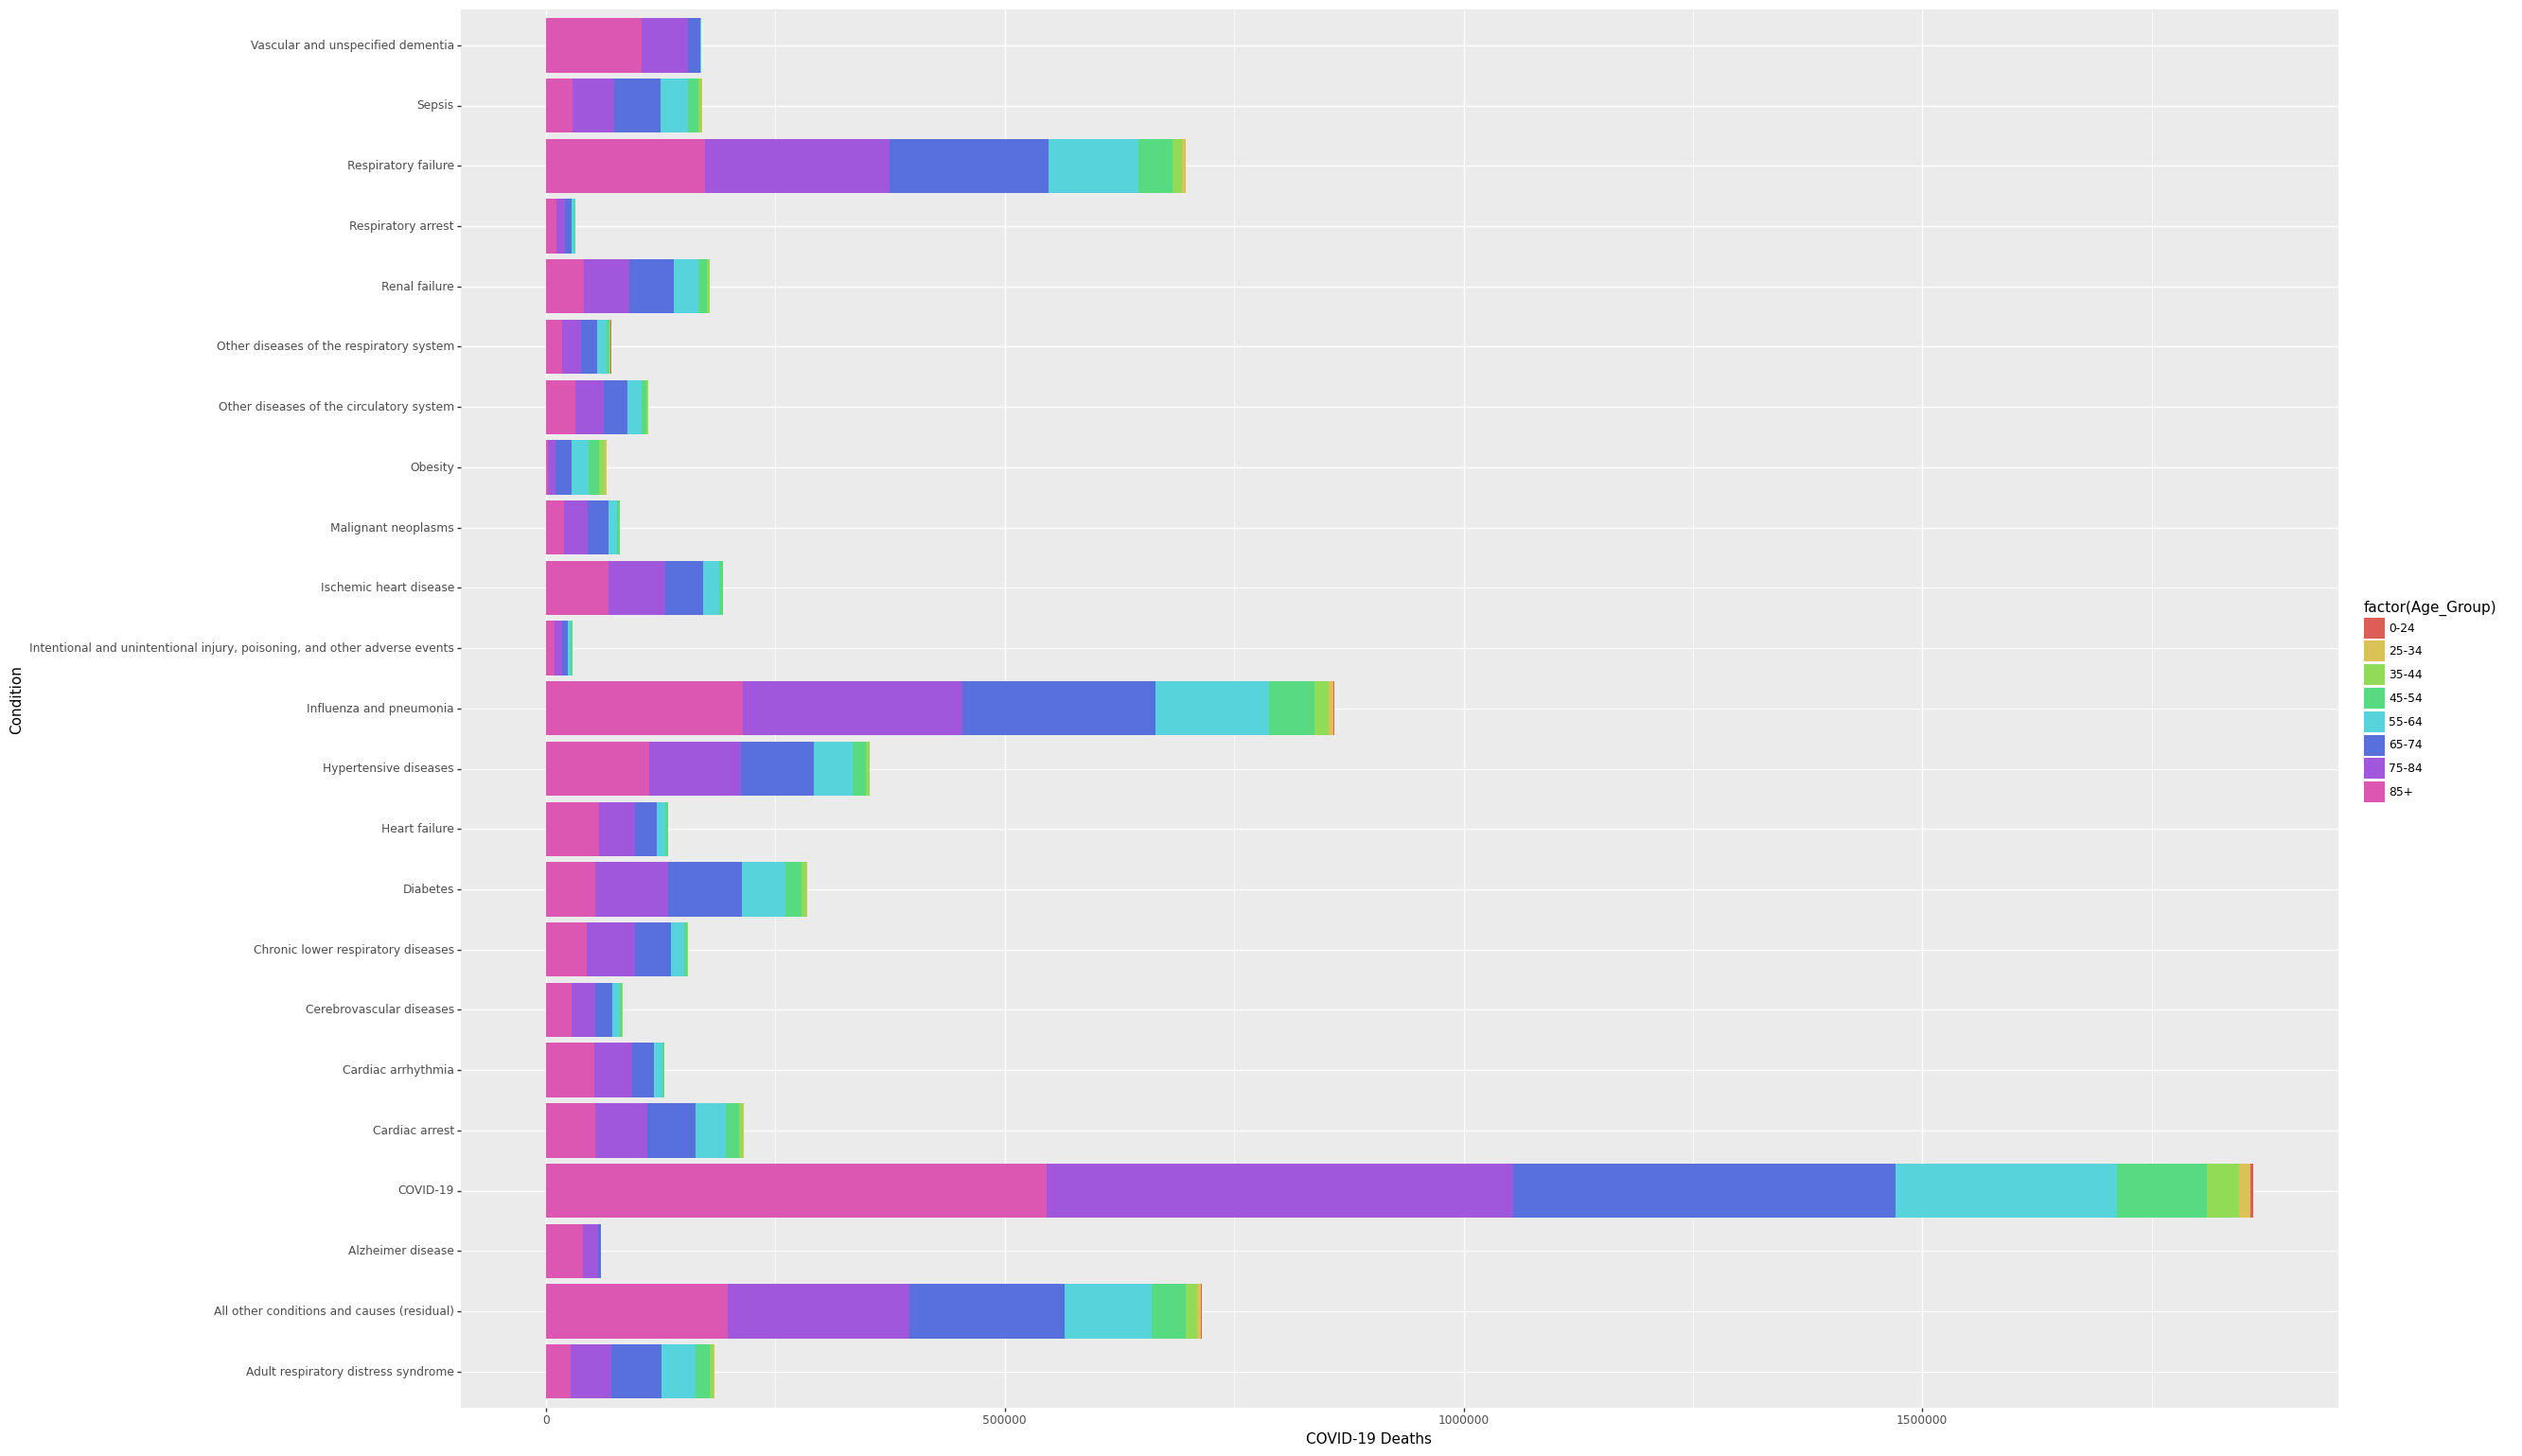

<ggplot: (8790860307157)>

In [18]:
ggplot(age_cause_deaths, aes(x='Condition',y='COVID-19 Deaths',fill='factor(Age_Group)')) + geom_bar(stat="identity") + coord_flip()